# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Dwi Liliyawati
- **Email:** dwililiya@gmail.com
- **ID Dicoding:** dwililiya

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Menentukan Pertanyaan Bisnis

1. Where should businesses focus marketing and promotional campaigns?

2. What products have the highest and the lowest number of sales?

3. How Has the Company's Sales and Revenue Performed in the Last Year?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In this project, I use e-commerce public dataset. Here's the link dataset: https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view

In [3]:
# load customers dataset
customers_df = pd.read_csv(('/content/drive/MyDrive/Laskar AI Projects/submission_analisa_data/data/customers_dataset.csv'))
customers_df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [4]:
# load geolocation dataset
geolocation_df = pd.read_csv('/content/drive/MyDrive/Laskar AI Projects/submission_analisa_data/data/geolocation_dataset.csv')
geolocation_df.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [5]:
# load products dataset
products_df = pd.read_csv('/content/drive/MyDrive/Laskar AI Projects/submission_analisa_data/data/products_dataset.csv')
products_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [6]:
# load category product translation
category_products_df = pd.read_csv('/content/drive/MyDrive/Laskar AI Projects/submission_analisa_data/data/product_category_name_translation.csv')
category_products_df.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [7]:
# load orders dataset
orders_df = pd.read_csv('/content/drive/MyDrive/Laskar AI Projects/submission_analisa_data/data/orders_dataset.csv')
orders_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [8]:
# load order items dataset
order_items_df = pd.read_csv('/content/drive/MyDrive/Laskar AI Projects/submission_analisa_data/data/order_items_dataset.csv')
order_items_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [9]:
# load order payments dataset
order_payments_df = pd.read_csv('/content/drive/MyDrive/Laskar AI Projects/submission_analisa_data/data/order_payments_dataset.csv')
order_payments_df.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [10]:
# load order reviews dataset
order_reviews_df = pd.read_csv('/content/drive/MyDrive/Laskar AI Projects/submission_analisa_data/data/order_reviews_dataset.csv')
order_reviews_df.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [11]:
# load sellers dataset
sellers_df = pd.read_csv('/content/drive/MyDrive/Laskar AI Projects/submission_analisa_data/data/sellers_dataset.csv')
sellers_df.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


**Insight:**
- This dataset has 9 csv files, including customers dataset, geolocation datasets, order items dataset, order payments dataset, order reviews dataset, orders dataset, product category name dataset, products dataset, and sellers dataset.

- Here's the data schema of dataset:

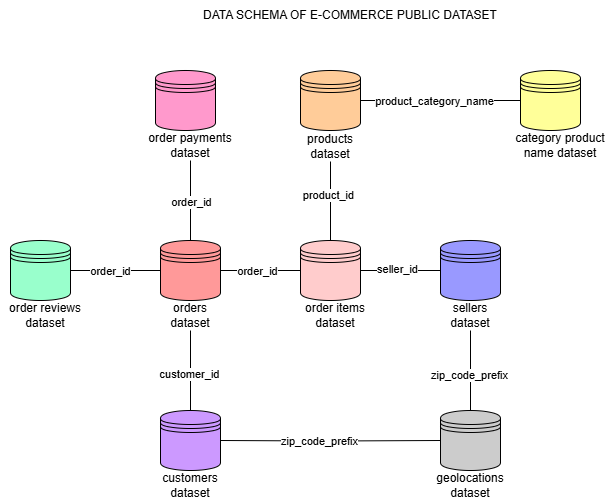

### Assessing Data

In [12]:
# assessing customers dataset
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
# check customer duplicate data
print("Jumlah Customer Duplikasi", customers_df.duplicated().sum())

Jumlah Customer Duplikasi 0


the customers dataset is good. There's no null value, no wrong data type, or duplicate data.

In [14]:
# assessing geolocations dataset
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


The geolocations dataset is also good

In [15]:
# assessing products dataset
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


I can see different number of all columns, it can be indicate missing value. Let me check

In [16]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


- There are 610 missing values in columns product_category_name, product_name_lenght, product_description_lenght, and product_photos_qty.

- There are also 2 missing values in columns product_weight_g, product_length_cm,product_height_cm and product_width_cm.


In [17]:
# assessing product category name
category_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


category of products in products dataset has more than 32k data, but in category product name translation only has 71 data?
I don't think this dataset will use for the next step. Maybe I can use it to find Top product selling in the last 3 months. we'll see

In [18]:
# assessing orders dataset
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [19]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


There are **160  missing values in column order_approved_at**, **1783 missing values in column order_delivered_carrier_date**, **2965 missing value in column order_delivered_customer date**.

There are wrong data type for columns order_purchase_timestamp,
order_approved_at,
order_delivered_carrier_date, order_delivered_customer_date,order_estimated_delivery_date. Those should be datetime, instead of object

As you can see, there are a lot of missing value.

So I breakdown for cases like this:
- order_approved_at -> these could be orders that were placed but never approved, for example failed or canceled transactions.
- order_delivered_carrier_date -> these could be orders that were never shipped, for example canceled before shipping, delays, etc.
- order_delivered_customer_date -> these could be orders that were never delivered, for example still in transit, lost or canceled.

So in the next step I should check, do missing order_approved_at values also have missing order_delivered_carrier_date and order_delivered_customer_date?
or are there orders with order_delivered_carrier_date but missing order_delivered_customer_date?

In [20]:
# assessing order items dataset
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


There's no null value, but column shipping_limit_date has wrong data type,it should be datetime, not object

In [21]:
# assessing order payments dataset
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Order payments dataset has good data. There's no null value and no wrong data type

In [22]:
# assessing order reviews dataset
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [23]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


There are 87656 missing value in column review_comment_title and 58247 missing value in column review_comment_message.

Column review_creation_date and column review_answer_timestamp have wrong data type. I should change it.

In [24]:
# assessing sellers dataset
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


sellers dataset is good

**Insight:**
<br>1. **Dataset with no issues** :



Customers Dataset, Geolocations Dataset, Sellers Dataset, and Order Payments Dataset.

<br>2. **Dataset with issues**:
- **Products Dataset**
  - **Missing values**:
610 missing values in product_category_name, product_name_length, product_description_length, and product_photos_qty.
2 missing values in product_weight_g, product_length_cm,product_height_cm, and product_width_cm.

- **Orders Dataset**:
  - **Missing values**:
160 missing in order_approved_at → Might be failed or canceled transactions.
1,783 missing in order_delivered_carrier_date → Might be orders that were never shipped.
2,965 missing in order_delivered_customer_date → Might be orders still in transit, lost, or canceled.

  - **Wrong data types**:
Columns order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, and order_estimated_delivery_date should be datetime, not object.

- **Order Items Dataset**
  - **Wrong data type**:
shipping_limit_date should be datetime, not object.

- **Order Reviews Dataset**
  - **Missing values**:
87,656 missing in review_comment_title.
58,247 missing in review_comment_message.

  - **Wrong data types**:
review_creation_date and review_answer_timestamp should be datetime, not object.

### Cleaning Data

**Cleaning Products Dataset**

In [25]:
# products_df
# check is missing value in same row
df_missing_products = products_df[products_df[['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']].isnull().all(axis=1)]
df_missing_products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


The result shows that some product-related columns have missing values. Instead of dropping these rows, I handled missing values as follows:

Missing values in product_category_name were replaced with "unknown" to retain product data while acknowledging the lack of category information.
Numerical attributes like product_name_lenght, product_description_lenght, and product_photos_qty were filled with their median values to avoid data loss and minimize the impact of outliers.

In [26]:
# handling missing values in columns ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']
products_df["product_category_name"] = products_df["product_category_name"].fillna("unknown")

num_cols = ["product_name_lenght", "product_description_lenght", "product_photos_qty"]

for col in num_cols:
    products_df[col] = products_df[col].fillna(products_df[col].median())

products_df.isnull().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [27]:
# we'll check if that missing values in same row
df_missing_products = products_df[products_df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].isnull().all(axis=1)]
df_missing_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,unknown,51.0,595.0,1.0,NaN,NaN,NaN,NaN


The missing value is in the same row. So I'm gonna fill missing values with median based on product category name

In [28]:
# handling missing value in columns ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_photos_qty']
product_missing_columns =['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in product_missing_columns:
  products_df[col] = products_df.groupby('product_category_name')[col].transform(lambda x: x.fillna(x.median()))

products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [29]:
products_df.to_csv('cleaned_products.csv', index=False)

**Cleaning Orders Dataset**

In [30]:
# handling wrong datatype in orders dataset
cols_orders = ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
for col in cols_orders:
  orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')

In [31]:
orders_df[cols_orders].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_purchase_timestamp       99441 non-null  datetime64[ns]
 1   order_approved_at              99281 non-null  datetime64[ns]
 2   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 3   order_delivered_customer_date  96476 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 3.8 MB


In [32]:
orders_df['order_status'].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [33]:
orders_df.groupby("order_status").apply(lambda x: x.isna().sum(), include_groups=False)

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,,,
approved,0,0,0,0,2,2,0
canceled,0,0,0,141,550,619,0
created,0,0,0,5,5,5,0
delivered,0,0,0,14,2,8,0
invoiced,0,0,0,0,314,314,0
processing,0,0,0,0,301,301,0
shipped,0,0,0,0,0,1107,0
unavailable,0,0,0,0,609,609,0


In [34]:
orders_df.loc[
    orders_df["order_approved_at"].isna() & (orders_df["order_status"] == "delivered"),
    ["order_id", "order_purchase_timestamp", "order_approved_at", "order_delivered_customer_date"]
]


,order_id,order_purchase_timestamp,order_approved_at,order_delivered_customer_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2017-02-18 14:40:00,NaT,2017-03-01 13:25:33
16567,8a9adc69528e1001fc68dd0aaebbb54a,2017-02-18 12:45:31,NaT,2017-03-02 10:05:06
19031,7013bcfc1c97fe719a7b5e05e61c12db,2017-02-18 13:29:47,NaT,2017-03-01 08:07:38
22663,5cf925b116421afa85ee25e99b4c34fb,2017-02-18 16:48:35,NaT,2017-03-09 07:28:47
23156,12a95a3c06dbaec84bcfb0e2da5d228a,2017-02-17 13:05:55,NaT,2017-03-02 11:09:19
26800,c1d4211b3dae76144deccd6c74144a88,2017-01-19 12:48:08,NaT,2017-01-30 18:16:01
38290,d69e5d356402adc8cf17e08b5033acfb,2017-02-19 01:28:47,NaT,2017-03-02 03:41:58
39334,d77031d6a3c8a52f019764e68f211c69,2017-02-18 11:04:19,NaT,2017-03-02 16:15:23
48401,7002a78c79c519ac54022d4f8a65e6e8,2017-01-19 22:26:59,NaT,2017-02-06 14:22:19
61743,2eecb0d85f281280f79fa00f9cec1a95,2017-02-17 17:21:55,NaT,2017-03-03 12:16:03


After checking, it turns out that there are 14 orders that have been delivered but the order_approved_at column is missing or may not be recorded. Then fix the missing data by filling it with order_purchase_timestamp. The reason is that the data pattern shows that order_approved_at usually occurs shortly after purchase.

In [35]:
# fill 14 missing value order_approved_at in order status delivered
orders_df.loc[
    orders_df["order_approved_at"].isna() & (orders_df["order_status"] == "delivered"),
    "order_approved_at"
] = orders_df["order_purchase_timestamp"]

In [36]:
orders_df.groupby("order_status").apply(lambda x: x.isna().sum())

<ipython-input-36-3e30ed6e30e1>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  orders_df.groupby("order_status").apply(lambda x: x.isna().sum())


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,,,,
approved,0,0,0,0,0,2,2,0
canceled,0,0,0,0,141,550,619,0
created,0,0,0,0,5,5,5,0
delivered,0,0,0,0,0,2,8,0
invoiced,0,0,0,0,0,314,314,0
processing,0,0,0,0,0,301,301,0
shipped,0,0,0,0,0,0,1107,0
unavailable,0,0,0,0,0,609,609,0


As we can see order grouping by order status. that's the reason why orders dataset has a lot missing value in  column order_approved_at, column order_delivered_carrier_date, and column order_delivered_customer date.

So we have to separate the order that did not result (failed) in a transaction because **orders with order status canceled and unavailable** means the transaction didn't happen. No payment has been received, no goods shipped, and doesn't contribute to business revenue.

Also separate dataset containing only successful **transaction with order status (delivered, shipped, invoiced, approved, processing)**

Also separate dataset containing pending orders **transaction with order status ( created)**, because no actual transaction has taken place

In [37]:
# orders success (delivered, shipped, invoiced, approved)
orders_success_df = orders_df[orders_df['order_status'].isin(['delivered', 'shipped', 'invoiced', 'approved', 'processing'])]

# orders failed (cancelled, unavailable)
orders_failed_df = orders_df[orders_df['order_status'].isin(['canceled', 'unavailable'])]

# orders pending (processing and created)
orders_pending_df = orders_df[orders_df['order_status'].isin(['created'])]

In [38]:
orders_success_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,619
order_delivered_customer_date,1732
order_estimated_delivery_date,0


Very insightful. So let's breakdown:

- missing order_delivered_carrier_date: 619 orders, these might have been delivered directly or missing shipping updates

- missing order_delivered_customer_date: 1732 orders, this is high, could be delays or missing tracking updates

Because of these, we'll leave the missing value

In [39]:
orders_pending_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,5
order_delivered_carrier_date,5
order_delivered_customer_date,5
order_estimated_delivery_date,0


So we gonna leave the missing value, because the orders likely still in process and no payment has been made.

In [40]:
orders_failed_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,141
order_delivered_carrier_date,1159
order_delivered_customer_date,1228
order_estimated_delivery_date,0


Let's breakdown this:
- missing order_approved_at 141 orders. These orders were never fully approved.
- missing order_delivered_carrier_date 1159 orders. These orders were never shipped.
- missing order_delivered_customer_date 1228 orders. These orders were never reached customers

In [41]:
orders_success_df.to_csv('cleaned_order_success.csv', index=False)
orders_failed_df.to_csv('cleaned_order_failed.csv', index=False)
orders_pending_df.to_csv('cleaned_order_pending.csv', index=False)

**Cleaning Order Items Dataset**

In [42]:
# handling wrong data type column shipping_limit_datein order items dataset
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], errors='coerce')

In [43]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [44]:
order_items_df.to_csv('cleaned_order_items.csv', index=False)

**Cleaning Order Reviews Dataset**

In [45]:
# handling wrong data types
cols_reviews = ['review_creation_date', 'review_answer_timestamp']
for col in cols_reviews:
  order_reviews_df[col] = pd.to_datetime(order_reviews_df[col], errors='coerce')

In [46]:
order_reviews_df[cols_reviews].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_creation_date     99224 non-null  datetime64[ns]
 1   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.5 MB


In [47]:
# handling missing value in columns review_comment_title and review_comment_message
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna("No Title")
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna("No Comment")

In [48]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [49]:
order_reviews_df.to_csv('cleaned_order_reviews.csv', index=False)

**Insight:**
- For orders data:
  - handling wrong datatype with converting object types to datetime
  - Leave missing values for orders in progress (created) and possibly delayed deliveries (delivered, shipped, invoiced, approved, processing).
  - Confirm failed transactions (canceled, unavailable) based on missing approval, shipping, and delivery dates.

- For products data:
  - Drop rows with missing all product details
  - Fill missing product dimensions using the median based on category

- For order items data:
  - handling wrong datatype with converting object type to datetime

- For order reviews data:
  - handling wrong datatype with converting object type to datetime
  - handling missing values for columns review_comment_title and review_comment_message using techniques filling with placeholder 'No Title' and 'No Comment'

### Merge Data

In [50]:
# merge order_items with products data to get product name and category
master_orders = order_items_df.merge(products_df, on="product_id", how="left")

# then merge with order_success to get order information
master_orders = master_orders.merge(orders_df, on="order_id", how="left")

# then merge with customer data
master_orders = master_orders.merge(customers_df, on="customer_id", how="left")

master_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name          112650 non-null  object        
 8   product_name_lenght            112650 non-null  float64       
 9   product_description_lenght     112650 non-null  float64       
 10  product_photos_qty             112650 non-null  float64       
 11  

In [51]:
master_orders['order_status'].value_counts()

,count
order_status,
delivered,110197
shipped,1185
canceled,542
invoiced,359
processing,357
unavailable,7
approved,3


In [52]:
master_orders['order_id'].nunique()

98666

In [53]:
master_orders['order_item_id'].count()

np.int64(112650)

In [54]:
# check duplicate data
master_orders.duplicated().sum()

np.int64(0)

In [55]:
# check missing value
master_orders.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0


In [56]:
master_orders.to_csv('master_orders.csv', index=False) # master all data orders success

**Get data only in 2018**

In [57]:
# I'll use order data in 2018 for the spesific analysis
master_orders_2018 = master_orders[master_orders["order_purchase_timestamp"].dt.year == 2018].copy()
master_orders_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61416 entries, 2 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       61416 non-null  object        
 1   order_item_id                  61416 non-null  int64         
 2   product_id                     61416 non-null  object        
 3   seller_id                      61416 non-null  object        
 4   shipping_limit_date            61416 non-null  datetime64[ns]
 5   price                          61416 non-null  float64       
 6   freight_value                  61416 non-null  float64       
 7   product_category_name          61416 non-null  object        
 8   product_name_lenght            61416 non-null  float64       
 9   product_description_lenght     61416 non-null  float64       
 10  product_photos_qty             61416 non-null  float64       
 11  product_weight_g   

In [58]:
master_orders_2018.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,count
order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,
fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79,cama_mesa_banho,47.0,511.0,1.0,600.0,30.0,3.0,19.0,96d649da0cc4ff33bb408b199d4c7dcf,delivered,2018-06-09 17:00:18,2018-06-09 17:10:13,2018-06-11 14:11:00,2018-06-14 17:56:26,2018-06-28,cd76a00d8e3ca5e6ab9ed9ecb6667ac4,18605,botucatu,SP,1
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1
000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,ferramentas_jardim,39.0,1310.0,3.0,13805.0,35.0,75.0,45.0,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-04 12:08:27,2018-07-05 16:35:48,2018-07-05 12:15:00,2018-07-09 14:04:07,2018-07-25,fda4476abb6307ab3c415b7e6d026526,11702,praia grande,SP,1
0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,beleza_saude,59.0,493.0,1.0,2000.0,30.0,12.0,16.0,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,2018-03-20 18:35:21,2018-03-28 00:37:42,2018-03-29 18:17:31,2018-03-29,639d23421f5517f69d0c3d6e6564cf0e,11075,santos,SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
001427c0ec99cf8af737bd88e92fd444,1,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2018-04-12 19:08:28,59.90,23.35,moveis_decoracao,60.0,1953.0,1.0,750.0,69.0,11.0,11.0,eab9c552374be06ed15923016dc9e588,delivered,2018-04-07 18:51:22,2018-04-07 19:08:28,2018-04-09 23:29:32,2018-04-25 23:38:41,2018-05-10,2ada69d1c5528233e3d9aa3f1d8da1b1,38304,ituiutaba,MG,1
00130c0eee84a3d909e75bc08c5c3ca1,1,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,2018-06-14 05:16:24,27.90,7.94,alimentos,59.0,982.0,1.0,150.0,17.0,13.0,13.0,47d656c08a282ec5ab4c1f18303a3a30,delivered,2018-06-11 21:17:00,2018-06-12 05:16:24,2018-06-12 14:22:00,2018-06-13 15:28:25,2018-06-20,b5910f24d2483d697b37e3857b621061,9820,sao bernardo do campo,SP,1
0011d82c4b53e22e84023405fb467e57,1,c389f712c4b4510bc997cee93e8b1a28,bfd27a966d91cfaafdb25d076585f0da,2018-01-29 21:51:25,289.00,26.33,malas_acessorios,41.0,500.0,1.0,2965.0,41.0,27.0,34.0,2013d892495e1a101d742d533d2d1119,delivered,2018-01-16 21:43:23,2018-01-16 21:51:25,2018-01-23 22:08:06,2018-01-26 22:14:02,2018-02-15,02daaa0e021d624d1784c4ea5cc84ace,1033,sao paulo,SP,1


In [59]:
# Filter only successful transactions
successful_status = ["delivered", "shipped", "invoiced", "approved", "processing"]
success_orders = master_orders_2018[master_orders_2018["order_status"].isin(successful_status)]

In [60]:
success_orders.to_csv('master_success_orders_2018.csv', index=False) # master all data orders

Nice!! Let's continue analysis

## Exploratory Data Analysis (EDA)

### Explore Customer Data (all)

In [61]:
# try to view the distribution of the number of customers by state
state_counts = customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)
state_counts

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


As we can see, Sao Paulo (SP) dominates with 41746 customers, significantly higher than the second-highest state, Rio de Janeiro (RJ) with 12852. And the third-highest state, Minas Gerais (MG) with 11635 customers. The distribution follows a similiar pattern to the city level data, where highly populated and economically developed regions have the most customers.

In [62]:
# try to view the distribution of the number of customers by city
city_counts = customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
city_counts

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
agisse,1
vieiras,1
bertopolis,1


As we can see, Sao Paulo has the highest number of customers (15,540), followed by Rio de Janeiro (6,882), Belo Horizonte (2,773), Brasilia (2,131), and Curitiba (1,521). There are many smaller cities with only a single customer, as indicated in the bottom rows. This suggest that the customer base is highly concentrated in major cities, with a long tail of customers in smaller towns.

**Insight:**
- Top 3 city distribution of customers are Sao Paulo (15540), Rio de Janeiro (6882), and Belo Horizonte (2773)
- Top 3 state distribution of customers are Sao Paulo (SP) with 41746, Rio de Janeiro (RJ) with 12852, and Minas Gerais (MG) with 11635 customers.

### Explore Order Customer Data (2018)

In [63]:
# try to view the distribution of the number of customers by state
state_counts = success_orders.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)
state_counts

,customer_id
customer_state,
SP,23599
RJ,6516
MG,6134
RS,2764
PR,2733
SC,1896
BA,1770
DF,1210
ES,1055


As we can see, Sao Paulo (SP) dominates with 23599 customers, significantly higher than the second-highest state, Rio de Janeiro (RJ) with 6516. And the third-highest state, Minas Gerais (MG) with 6134 customers. The distribution follows a similiar pattern to the city level data, where highly populated and economically developed regions have the most customers.

In [64]:
# try to view the distribution of the number of customers by city
city_counts = success_orders.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
city_counts

,customer_id
customer_city,
sao paulo,9005
rio de janeiro,3478
belo horizonte,1543
brasilia,1210
curitiba,858
...,...
pardinho,1
paranatinga,1
paranaita,1


As we can see, Sao Paulo has the highest number of customers (9005), followed by Rio de Janeiro (3478), Belo Horizonte (1543), Brasilia (1210), and Curitiba (858). There are many smaller cities with only a single customer, as indicated in the bottom rows. This suggest that the customer base is highly concentrated in major cities, with a long tail of customers in smaller towns.

**Insight:**
- Top 3 state distribution of customers are Sao Paulo (SP) with 23599, Rio de Janeiro (RJ) with 6516, and Minas Gerais (MG) with 6134 customers.
- Top 3 city distribution of customers are Sao Paulo (9005), Rio de Janeiro (3478), and Belo Horizonte (1543)

### Explore Product Sales Data 2018

In [65]:
# best-selling category product analysis  in 2018
top_products = success_orders.groupby(["product_category_name"])["order_item_id"].count().reset_index()
top_products = top_products.sort_values(by="order_item_id", ascending=False).head(10)
top_products.rename(columns={"order_item_id": "total_products_sold"}, inplace=True)
top_products = top_products.merge(category_products_df, on="product_category_name", how="left")
top_products

,product_category_name,total_products_sold,product_category_name_english
0,beleza_saude,5924,health_beauty
1,cama_mesa_banho,5873,bed_bath_table
2,informatica_acessorios,4683,computers_accessories
3,esporte_lazer,4503,sports_leisure
4,moveis_decoracao,4098,furniture_decor
5,utilidades_domesticas,4020,housewares
6,relogios_presentes,3695,watches_gifts
7,automotivo,2610,auto
8,telefonia,2330,telephony
9,ferramentas_jardim,1874,garden_tools


**Insight :**
- The "beleza_saude" (Beauty & Health) category was the best-selling, with a total of 5,924 products sold. This indicates a strong market demand for skincare, cosmetics, and healthcare products, which are essential and widely used.

- The "cama_mesa_banho" (Bed, Bath & Table) category ranked second, selling 5,873 products. This suggests that home essentials such as bed linens, towels, and tableware remain in high demand, likely driven by home improvement trends.

- The "informatica_acessorios" (Computer Accessories) category had 4,683 products sold, showing continued consumer interest in tech gadgets and accessories, potentially fueled by remote work and gaming trends.

- The "esporte_lazer" (Sports & Leisure) category sold 4,503 products, reflecting an active interest in fitness and outdoor activities. This suggests that customers are willing to invest in sports equipment and leisure-related products.

- The "moveis_decoracao" (Furniture & Decor) category recorded 4,098 sales, reinforcing the trend of consumers investing in home aesthetics and furniture improvements.

- The household and utility categories also showed strong sales:

  - "utilidades_domesticas" (Housewares) had 4,020 products sold, indicating steady demand for home essentials.
  -"relogios_presentes" (Watches & Gifts) had 3,695 products sold, suggesting that watches and gift items remain popular for personal use and gifting purposes.

- The automotive and tech-related categories had moderate sales:

  - "automotivo" (Auto) had 2,610 products sold, showing a niche but steady market for car accessories and related products.
  - "telefonia" (Telephony) had 2,330 products sold, indicating a demand for mobile phones and accessories, though lower than other tech-related categories.

- The "ferramentas_jardim" (Garden Tools) category had 1,874 products sold, making it the lowest-selling category in Top 10 Best Selling. This may indicate that gardening tools are not a priority purchase for most customers or that demand is seasonal.

In [66]:
# worst-selling category product analysis
bottom_products = success_orders.groupby(["product_category_name"])["order_item_id"].count().reset_index()
bottom_products = bottom_products.sort_values(by="order_item_id", ascending=True).head(10)
bottom_products.rename(columns={"order_item_id": "total_products_sold"}, inplace=True)
bottom_products = bottom_products.merge(category_products_df, on="product_category_name", how="left")
bottom_products

,product_category_name,total_products_sold,product_category_name_english
0,cds_dvds_musicais,1,cds_dvds_musicals
1,fashion_roupa_infanto_juvenil,3,fashion_childrens_clothes
2,la_cuisine,4,la_cuisine
3,pc_gamer,4,NaN
4,fashion_esporte,5,fashion_sport
5,casa_conforto_2,10,home_comfort_2
6,portateis_cozinha_e_preparadores_de_alimentos,14,NaN
7,fashion_roupa_feminina,16,fashio_female_clothing
8,moveis_colchao_e_estofado,20,furniture_mattress_and_upholstery
9,artes_e_artesanato,22,arts_and_craftmanship


In [67]:
# handling NaN values
bottom_products.loc[bottom_products['product_category_name'] == 'pc_gamer', 'product_category_name_english'] = 'pc_gamer'
bottom_products.loc[bottom_products['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english'] = 'portable_kitchen_and_food_processors'
bottom_products

,product_category_name,total_products_sold,product_category_name_english
0,cds_dvds_musicais,1,cds_dvds_musicals
1,fashion_roupa_infanto_juvenil,3,fashion_childrens_clothes
2,la_cuisine,4,la_cuisine
3,pc_gamer,4,pc_gamer
4,fashion_esporte,5,fashion_sport
5,casa_conforto_2,10,home_comfort_2
6,portateis_cozinha_e_preparadores_de_alimentos,14,portable_kitchen_and_food_processors
7,fashion_roupa_feminina,16,fashio_female_clothing
8,moveis_colchao_e_estofado,20,furniture_mattress_and_upholstery
9,artes_e_artesanato,22,arts_and_craftmanship


**Insight :**
- The "cds_dvds_musicais" (CDs & Musical DVDs) category had the lowest sales, with only 1 product sold. This suggests a decline in demand for physical media, likely due to the growing dominance of digital streaming services.

- The "fashion_roupa_infanto_juvenil" (Fashion - Children's Clothes) category had 3 products sold, indicating low traction for children's clothing on this platform, possibly due to high competition or consumer preference for in-store purchases.

- The "la_cuisine" (Kitchenware) and "pc_gamer" (PC Gaming) categories each had 4 products sold, showing that these categories are struggling to gain momentum, potentially due to pricing, product selection, or competition from specialized retailers.

- The "fashion_esporte" (Sports Fashion) category saw 5 products sold, suggesting limited demand for sportswear, or a preference for mainstream brands available in other marketplaces.

- The "casa_conforto_2" (Home Comfort) category had 10 products sold, reflecting some demand but still ranking among the lowest-selling categories. This could indicate a need for better marketing or a more diverse product selection.

- The "portateis_cozinha_e_preparadores_de_alimentos" (Portable Kitchen & Food Processors) category recorded 14 sales, which might indicate a niche market with moderate demand, possibly affected by competition from larger kitchen appliance brands.

- The "fashion_roupa_feminina" (Fashion - Female Clothing) category had 16 sales, which, despite being a high-demand segment in general, still ranks low in this dataset, possibly due to style preferences or brand availability.

- The "moveis_colchao_e_estofado" (Furniture, Mattress, and Upholstery) category had 20 sales, indicating some demand but suggesting that furniture sales on this platform may face challenges related to logistics and consumer trust.

- The "tablets_impressao_imagem" (Tablets, Printing & Image) category had 22 sales, making it the highest-selling category within this bottom 10 list. This suggests that while there is some interest in tech-related products, it may be overshadowed by newer or more advanced technology offerings.

### Explore Order Sales Data 2018

In [79]:
success_orders['order_id'].nunique()

53531

In [69]:
master_orders_2018['order_purchase_timestamp'].max()

Timestamp('2018-09-03 09:06:57')

In [70]:
# monthly orders
monthly_orders = success_orders.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum",
    "customer_id": "nunique"
})
monthly_orders.index = monthly_orders.index.strftime('%Y-%m')
monthly_orders = monthly_orders.reset_index()
monthly_orders.rename(columns={"order_purchase_timestamp":"order_purchase_date",
                               "order_id": "order_count",
                               "price": "revenue",
                               "customer_id": "customer_count"}, inplace=True)
monthly_orders

,order_purchase_date,order_count,revenue,customer_count
0,2018-01,7187,945456.29,7187
1,2018-02,6624,837895.43,6624
2,2018-03,7168,981051.06,7168
3,2018-04,6919,993592.98,6919
4,2018-05,6833,992871.75,6833
5,2018-06,6145,863265.53,6145
6,2018-07,6233,878044.27,6233
7,2018-08,6421,848860.10,6421
8,2018-09,1,145.00,1


## Visualization & Explanatory Analysis

### Pertanyaan 1: Where should businesses focus marketing and promotional campaigns?

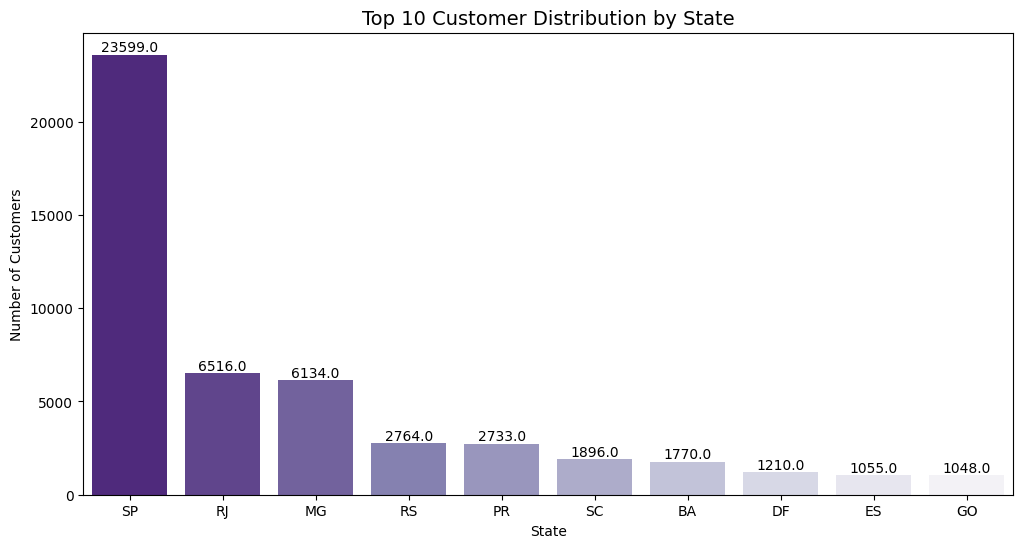

In [71]:
# plot state distribution
plt.figure(figsize=(12,6))
top_states = state_counts.head(10)
ax = sns.barplot(x=top_states.index, y=top_states.values,hue=top_states.index, palette="Purples_r", legend=False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom", fontsize=10)
ax.grid(False)
plt.title("Top 10 Customer Distribution by State", fontsize=14)
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.show()

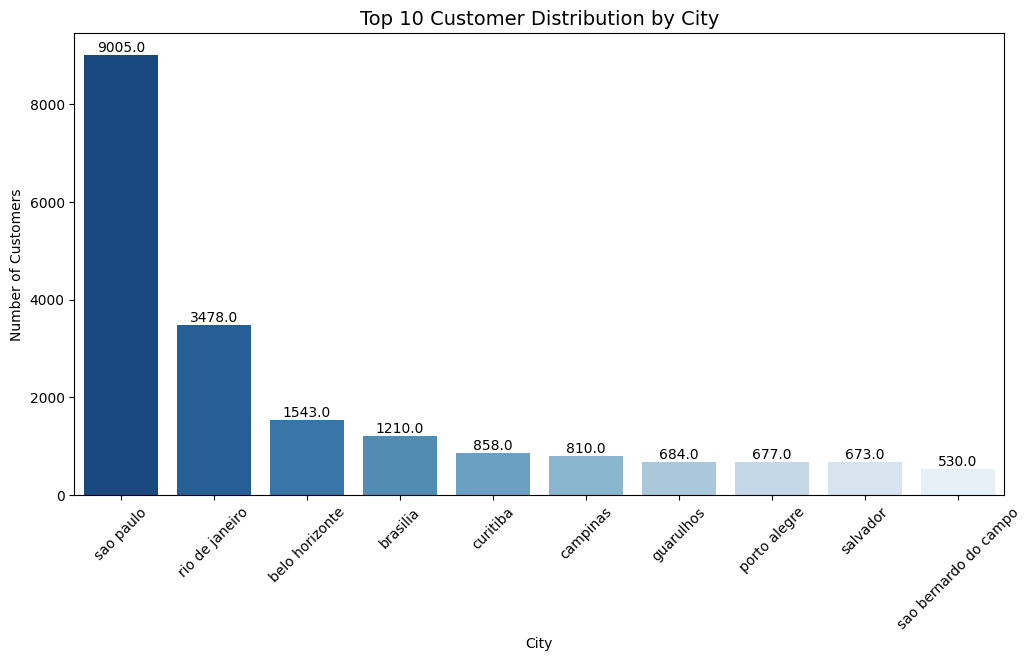

In [72]:
# plot top 10 city distribution
top_cities = city_counts.head(10)
plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_cities.index, y=top_cities.values, hue=top_cities.index, palette="Blues_r", legend=False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha="center", va="bottom")
ax.grid(False)

plt.title("Top 10 Customer Distribution by City", fontsize=14)
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

**Insight:**

- Based on the exploration and visualization of customer data, the distribution of customers is highly concentrated in major metropolitan areas and economically developed states. The majority of customers are located in Sao Paulo (SP), which has the highest number of customers, followed by Rio de Janeiro (RJ) and Minas Gerais (MG).

- This suggests that businesses may benefit from focusing their marketing and operational efforts in these key regions. Additionally, while many smaller cities have only a few customers, the overall trend shows that urban centers and more populous states attract the highest customer numbers.

- Factors such as infrastructure, economic activity, and population density significantly influence customer distribution. Understanding this pattern can help businesses optimize their marketing strategies, logistics, and expansion plans to target high-potential areas effectively.

### Pertanyaan 2: What products have the highest and lowest number of sales?

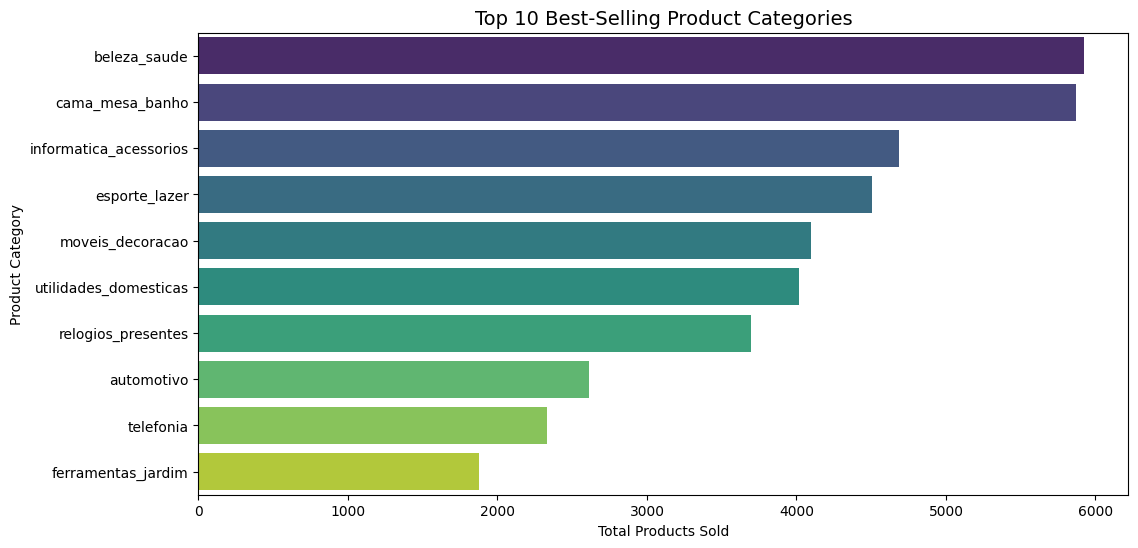

In [73]:
# plot for best selling products
plt.figure(figsize=(12, 6))
sns.barplot(y=top_products["product_category_name"],
                 x=top_products["total_products_sold"], hue=top_products["product_category_name"], palette="viridis", legend=False)
plt.title("Top 10 Best-Selling Product Categories", fontsize=14)
plt.xlabel("Total Products Sold")
plt.ylabel("Product Category")
plt.show()

**Insight:**

- Health & Beauty (health_beauty) is the best-selling category, with nearly 6,000 products sold. This reflects the strong demand for skincare, cosmetics, and wellness products, making it a great category for promotional campaigns, influencer collaborations, and personalized product recommendations.

- Home-related categories such as bed_bath_table and furniture_decor are among the top sellers, highlighting that customers are actively investing in home improvement and comfort. Offering bundled products, seasonal discounts, and home decor inspirations could further boost sales.

- Technology & computer accessories (computers_accessories) rank highly, but still fall behind home-related and beauty categories. This suggests consistent demand for tech gadgets and accessories, which can be enhanced through bundle deals, limited-time offers, or tech upgrades.

- Sports & Leisure (sports_leisure) is a popular category, showing that customers are interested in fitness and outdoor activities. This could be leveraged by offering product guides, fitness influencer collaborations, and discounts on sports gear.

- Housewares (housewares) and Watches & Gifts (watches_gifts) categories remain strong, indicating steady demand. Marketing can focus on gift bundles, seasonal campaigns, and limited-edition releases to drive more sales.

- Automotive (auto) and Telephony (telephony) categories, while not leading, still show significant sales, suggesting a niche but dedicated market for car accessories and mobile products. A focus on tech compatibility, innovation, and exclusive deals may enhance traction.

- Garden Tools (garden_tools) is the lowest in the top 10, but still performs well, indicating an interest in home gardening and DIY outdoor projects. This category can benefit from seasonal promotions, gardening tips, and home improvement content.


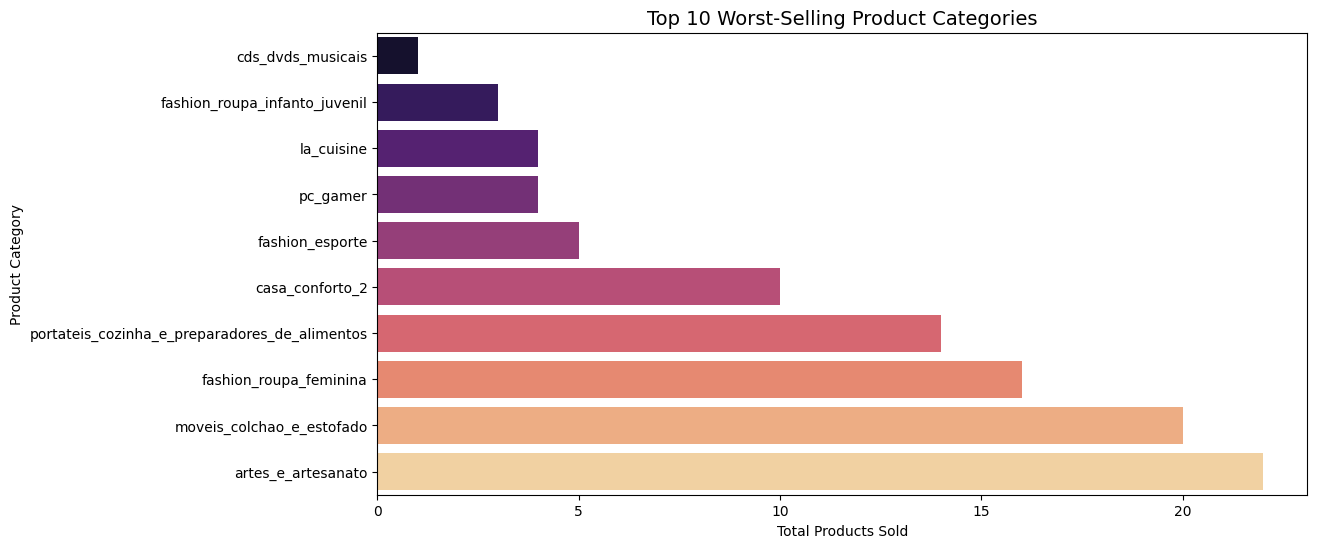

In [74]:
# plot for worst selling products
plt.figure(figsize=(12, 6))
sns.barplot(y=bottom_products["product_category_name"],
                 x=bottom_products["total_products_sold"], hue=bottom_products["product_category_name"], palette="magma", legend=False)
plt.title("Top 10 Worst-Selling Product Categories", fontsize=14)
plt.xlabel("Total Products Sold")
plt.ylabel("Product Category")
plt.show()

**Insight :**

- CDs & DVDs (cds_dvds_musicals) had the lowest sales, with only 1 product sold. This strongly suggests that physical media is being replaced by digital streaming services, making it a declining category for e-commerce.

- Fashion - Children's Clothes (fashion_childrens_clothes) and PC Gaming (pc_gamer) both had very low sales. This could indicate that:

  - Children's fashion may not be a primary shopping priority on this platform or it lacks visibility.
  - PC gaming accessories may have low demand due to pricing, competition from specialized retailers, or changing gaming trends.

- Kitchen-related categories (la_cuisine and portable_kitchen_and_food_processors) had limited sales. This could be due to:

  - Consumers preferring to buy kitchenware in physical stores to assess quality.
  - A niche market that requires better marketing strategies, such as cooking influencers or bundle deals.
  -
Home Comfort (home_comfort_2) and Fashion - Sports (fashion_sport) saw moderate sales but still ranked among the lowest.

  - Home decor products might need better promotional strategies or seasonal discounts to boost interest.
  - Sports fashion may face high competition from larger, more established sports brands.
  
- Tablets & Printing (tablets_printing_image) was the highest-selling category among the worst performers.This suggests that despite lower demand, tech-related products still maintain a niche audience.

### Pertanyaan 3: How Has the Company's Sales and Revenue Performed in the Last Year?

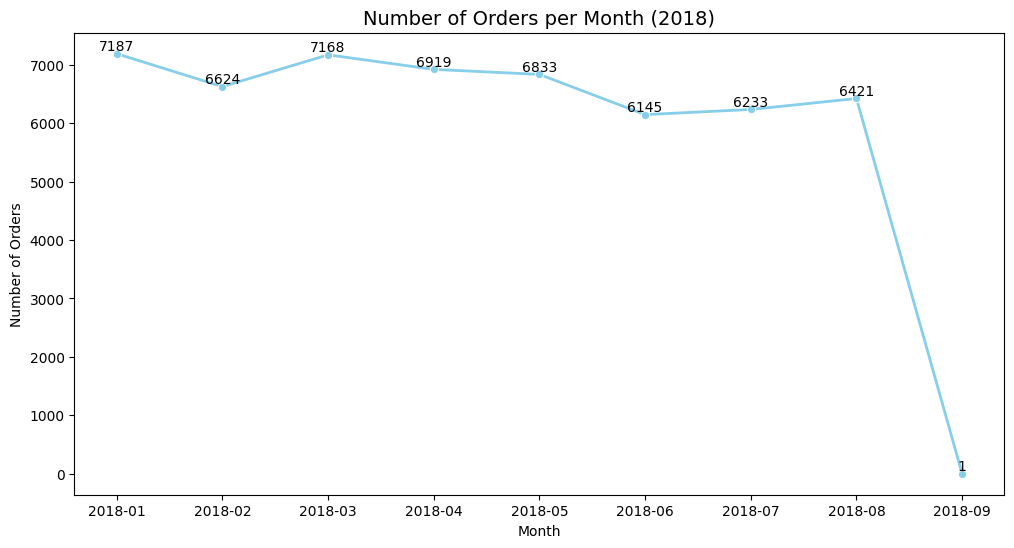

In [75]:
# plot monthly orders by count order
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=monthly_orders, x="order_purchase_date", y="order_count",
             marker="o", linewidth=2, color="skyblue")
for x,y in zip(monthly_orders["order_purchase_date"], monthly_orders["order_count"]):
    plt.text(x, y, f"{y}", fontsize=10, ha='center', va='bottom', color="black")

plt.title("Number of Orders per Month (2018)", loc="center", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()


Based on the Number of Orders per Month (2018) graph, it can be seen that the highest number of orders occurred in January. After that, the number of orders fluctuated slightly throughout the year, with a noticeable drop in June.

The drastic drop in September is due to the fact that the last date of the order was recorded on September 3, 2018. This is most likely due to operational factors, such as system changes, technical glitches, or other external factors.

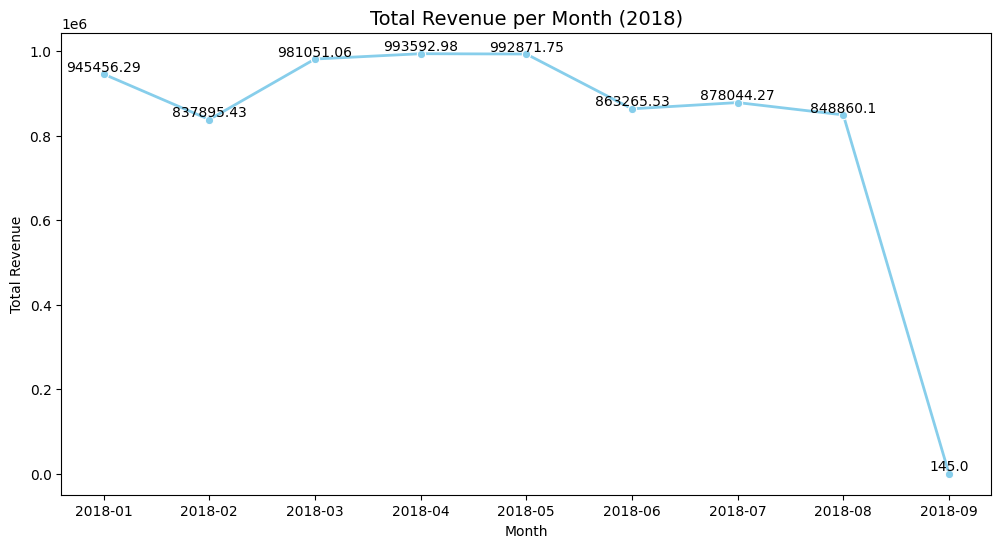

In [76]:
# plot monthly orders by total revenue
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=monthly_orders, x="order_purchase_date", y="revenue",
             marker="o", linewidth=2, color="skyblue")
for x,y in zip(monthly_orders["order_purchase_date"], monthly_orders["revenue"]):
    plt.text(x, y, f"{y}", fontsize=10, ha='center', va='bottom', color="black")

plt.title("Total Revenue per Month (2018)", loc="center", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

Based on the Total Revenue per Month (2018) graph, it can be seen that the trend of total revenue generally follows the number of orders. However, there is something interesting in April, where the total revenue reached 993,592.98, even though the number of orders was only 6,919. In contrast, January, which had the highest number of orders (7,187), had a lower revenue of 945,456.29.

This difference suggests that the average price per transaction in April may be higher than in January. This could be due to an increase in sales of higher priced products or a change in pricing strategy.

## Analisis Lanjutan RFM Analysis

In [77]:
rfm_df = master_orders_2018.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_purchase_timestamp", "frequency", "monetary"]

# mapping customer_id to number sequences
customer_mapping = {cid: f"C{i}" for i, cid in enumerate(rfm_df["customer_id"].unique(), start=1)}
rfm_df["customer_label"] = rfm_df["customer_id"].map(customer_mapping)

# count when the last time customer order (day)
rfm_df["max_purchase_timestamp"] = rfm_df["max_purchase_timestamp"].dt.date
recent_date = rfm_df["max_purchase_timestamp"].max()
rfm_df["recency"] = rfm_df["max_purchase_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_purchase_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,customer_label,recency
0,000379cdec625522490c315e70c7a9fb,1,93.0,C1,154
1,000419c5494106c306a97b5635748086,1,34.3,C2,185
2,000598caf2ef4117407665ac33275130,1,1107.0,C3,23
3,0005aefbb696d34b3424dccd0a0e9fd0,1,134.9,C4,75
4,00066ccbe787a588c52bd5ff404590e3,1,199.6,C5,209


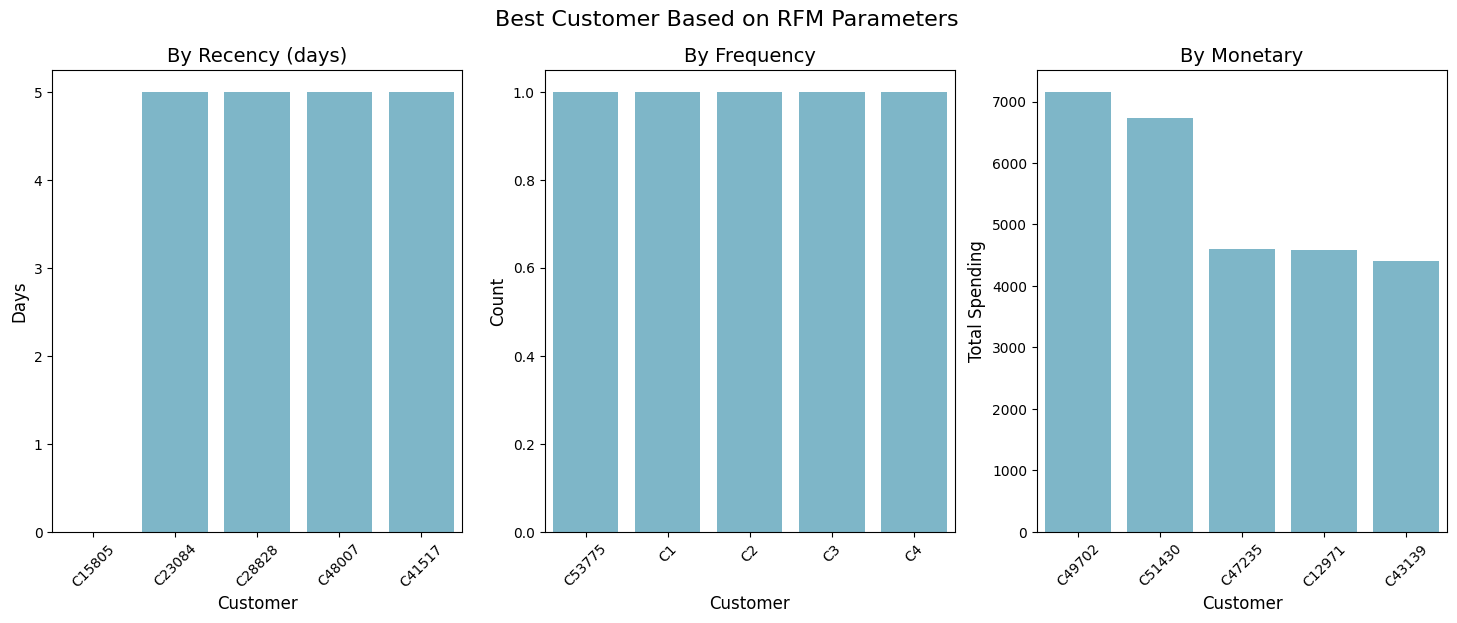

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

colors = ["#72BCD4"] * 5

sns.barplot(y="recency", x="customer_label",
            data=rfm_df.sort_values(by="recency", ascending=True).head(5),
            hue="customer_label", palette=colors, ax=ax[0], legend=False)
ax[0].set_title("By Recency (days)", fontsize=14)
ax[0].set_xlabel("Customer", fontsize=12)
ax[0].set_ylabel("Days", fontsize=12)
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(y="frequency", x="customer_label",
            data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
            hue="customer_label", palette=colors, ax=ax[1], legend=False)
ax[1].set_title("By Frequency", fontsize=14)
ax[1].set_xlabel("Customer", fontsize=12)
ax[1].set_ylabel("Count", fontsize=12)
ax[1].tick_params(axis='x', rotation=45)

sns.barplot(y="monetary", x="customer_label",
            data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
            hue="customer_label", palette=colors, ax=ax[2], legend=False)
ax[2].set_title("By Monetary", fontsize=14)
ax[2].set_xlabel("Customer", fontsize=12)
ax[2].set_ylabel("Total Spending", fontsize=12)
ax[2].tick_params(axis='x', rotation=45)

plt.suptitle("Best Customer Based on RFM Parameters", fontsize=16)
plt.show()

**The Result of Analysis Best Customer Based On RFM Parameters**

**1. By Recency (Days)**

Recency measures how recently a customer last made a transaction. The lower the number, the more recent their last transaction, which means they are still actively shopping. From the chart, the customers with the lowest recency (0 and 5 days) are C15805, C48007, C28828, C48387, and C41517.

**2. By Frequency**

Frequency measures how often customers make transactions within a certain period. The higher the value, the more often the customer shops. From the graph, the customers with the highest frequency are C1, C35868, C35844, C35845, and C35846. However, upon further investigation, it turns out that all customers in this dataset have only made one transaction. This means that there are no customers who make repeat purchases, so frequency cannot be used to determine the best customers based on loyalty.

**3. By Monetary**

Monetary measures the total money a customer spends in a given period. The higher the value, the more they spent. From the chart, the customers with the highest monetary are C49702, C51430, C47235, C12971, and C43139. They are big spenders who contribute greatly to the business revenue. To retain them, strategies such as VIP programs, exclusive services, or special discounts for premium customers can be used.

## Conclusion

- **Conclution pertanyaan 1:**
  - Businesses should concentrate their marketing and promotional campaigns in major metropolitan areas and economically developed states, particularly in São Paulo (SP), Rio de Janeiro (RJ), and Minas Gerais (MG), where customer concentration is highest. The strong presence of customers in these regions is influenced by factors such as infrastructure, economic activity, and population density. By focusing efforts on these high-potential areas, businesses can optimize their marketing strategies, improve logistics efficiency, and maximize customer engagement and growth opportunities.

- **Conclution pertanyaan 2:**
  - The best-selling products fall within categories such as Health & Beauty, Home-related products (bed_bath_table, furniture_decor), and Technology & Computer Accessories. These categories reflect strong consumer interest in personal care, home improvement, and tech gadgets. Businesses can leverage this demand by using promotional campaigns, influencer collaborations, bundle deals, and seasonal discounts to further drive sales.

  - On the other hand, the lowest-selling categories include CDs & DVDs, Children's Fashion, and PC Gaming Accessories. The decline in physical media sales suggests a shift towards digital streaming services. Low sales in children's fashion and gaming accessories may indicate a lack of visibility, high competition, or changing consumer preferences. Similarly, kitchen-related products and sports fashion face challenges that may require enhanced marketing strategies such as influencer partnerships, product bundling, and targeted promotions to improve sales performance.

  - Understanding these trends allows businesses to focus on high-performing categories while reassessing strategies for lower-selling ones.
  
- **Conclution pertanyaan 3:**
  - The company's sales and revenue performance in the last year showed fluctuations, with the highest number of orders recorded in January 2018. However, sales numbers varied throughout the year, with a noticeable dip in June and a drastic decline in September, likely due to operational factors such as system changes or technical issues.

  - Revenue trends generally followed the number of orders, but an interesting anomaly occurred in April, where total revenue peaked at $993,592.98, despite having fewer orders than January. This suggests a shift in pricing strategy or an increase in the sales of higher-priced products during that period.

 - Overall, understanding these patterns can help the company optimize sales strategies, improve operational stability, and capitalize on periods of high-value transactions to maximize revenue growth.